In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes_data.csv')

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80,0,1,never,25.19,6.6,140,0
1,Female,54,0,0,No Info,27.32,6.6,80,0
2,Male,28,0,0,never,27.32,5.7,158,0
3,Female,36,0,0,current,23.45,5.0,155,0
4,Male,76,1,1,current,20.14,4.8,155,0


In [4]:
df = df[df['age'] > 5] 

In [5]:
df.shape

(93711, 9)

In [6]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,93711.000000,93711.000000,93711.000000,93711.000000,93711.000000,93711.000000,93711.000000
mean,44.515382,0.079863,0.042055,27.898227,5.535581,138.429864,0.090619
std,20.754560,0.271082,0.200715,6.353779,1.076356,41.076201,0.287068
min,6.000000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,28.000000,0.000000,0.000000,24.500000,4.800000,100.000000,0.000000
50%,45.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,61.000000,0.000000,0.000000,30.020000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [7]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

<Axes: xlabel='diabetes', ylabel='count'>

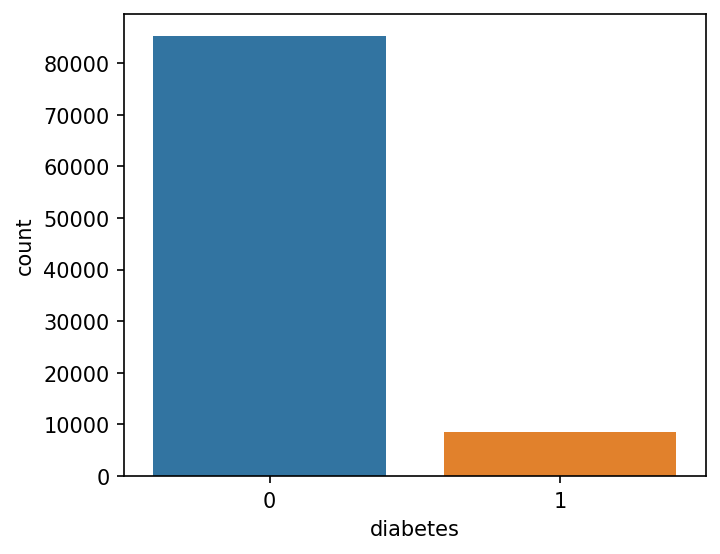

In [8]:
plt.figure(figsize=(5, 4), dpi=150)
sns.countplot(x=df['diabetes'])

In [9]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

<Axes: xlabel='gender', ylabel='count'>

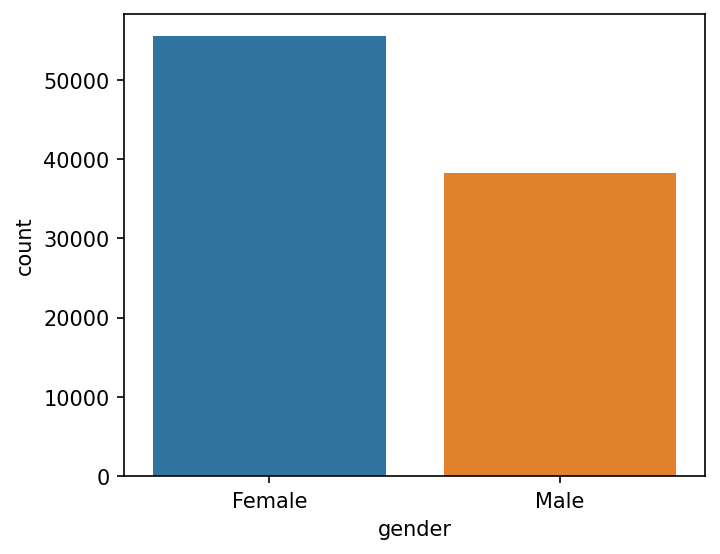

In [10]:
plt.figure(figsize=(5, 4), dpi=150)
sns.countplot(x=df['gender'])

In [11]:
len(df[df['gender'] == "Other"])

0

In [12]:
df = df[df['gender'] != "Other"]

In [13]:
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

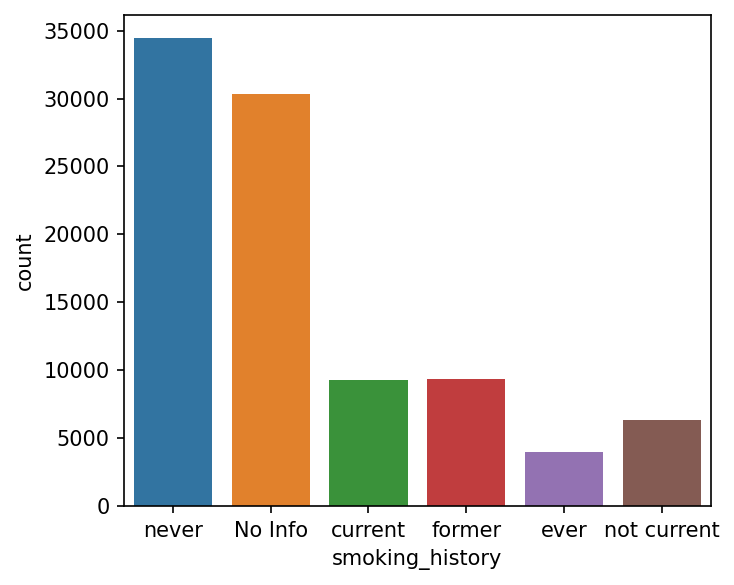

In [14]:
plt.figure(figsize=(5, 4), dpi=150)
sns.countplot(x=df['smoking_history'])
plt.tight_layout()

In [15]:
df['gender'] = pd.get_dummies(df['gender'], drop_first=True)

In [16]:
df['gender']

0        False
1        False
2         True
3        False
4         True
         ...  
94699    False
94700    False
94701     True
94702    False
94703    False
Name: gender, Length: 93711, dtype: bool

In [17]:
df2 = pd.get_dummies(df['smoking_history'], drop_first=True)

In [18]:
df2.head()

,current,ever,former,never,not current
0,False,False,False,True,False
1,False,False,False,False,False
2,False,False,False,True,False
3,True,False,False,False,False
4,True,False,False,False,False


In [19]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,False,80,0,1,never,25.19,6.6,140,0
1,False,54,0,0,No Info,27.32,6.6,80,0
2,True,28,0,0,never,27.32,5.7,158,0
3,False,36,0,0,current,23.45,5.0,155,0
4,True,76,1,1,current,20.14,4.8,155,0


In [20]:
plt.figure(figsize=(6, 6), dpi=150)
sns.heatmap(df.corr(), annot=True)

ValueError: could not convert string to float: 'never'

<Figure size 900x900 with 0 Axes>

In [21]:
df.corr()['diabetes'].sort_values()[:-1]

ValueError: could not convert string to float: 'never'

<Axes: xlabel='diabetes', ylabel='blood_glucose_level'>

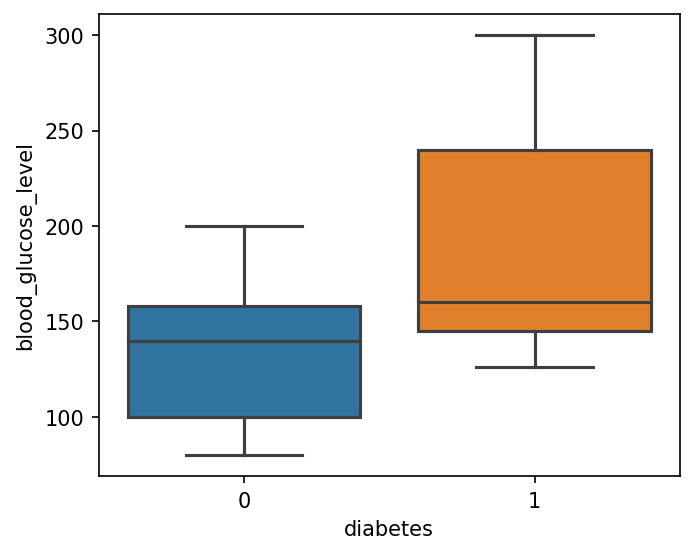

In [22]:
plt.figure(figsize=(5, 4), dpi=150)
sns.boxplot(x=df['diabetes'], y=df['blood_glucose_level'])

<Axes: xlabel='HbA1c_level', ylabel='blood_glucose_level'>

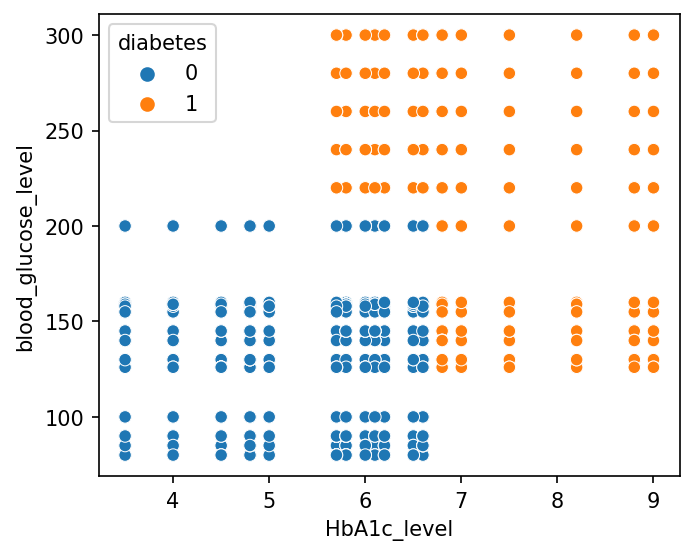

In [23]:
plt.figure(figsize=(5, 4), dpi=150)
sns.scatterplot(x=df['HbA1c_level'],hue=df['diabetes'], y=df['blood_glucose_level'])

In [24]:
df = pd.concat([df, df2], axis=1)

In [25]:
df = df.drop('smoking_history', axis=1)

In [26]:
df.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,current,ever,former,never,not current
0,False,80,0,1,25.19,6.6,140,0,False,False,False,True,False
1,False,54,0,0,27.32,6.6,80,0,False,False,False,False,False
2,True,28,0,0,27.32,5.7,158,0,False,False,False,True,False
3,False,36,0,0,23.45,5.0,155,0,True,False,False,False,False
4,True,76,1,1,20.14,4.8,155,0,True,False,False,False,False


In [27]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']

In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [32]:
rfc = RandomForestClassifier()

In [31]:
param_grid = {'n_estimators': [64, 100, 128], "max_features":[2, 3, 4, 11], "bootstrap":[True, False]}

In [32]:
grid = GridSearchCV(rfc, param_grid)

In [33]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [2, 3, 4, 11],
                         'n_estimators': [64, 100, 128]})

In [34]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 100}

In [35]:
y_pred = grid.predict(X_test)

In [36]:
accuracy_score(y_test, y_pred)

0.9701212611156023

In [37]:
con_mat = confusion_matrix(y_test, y_pred)

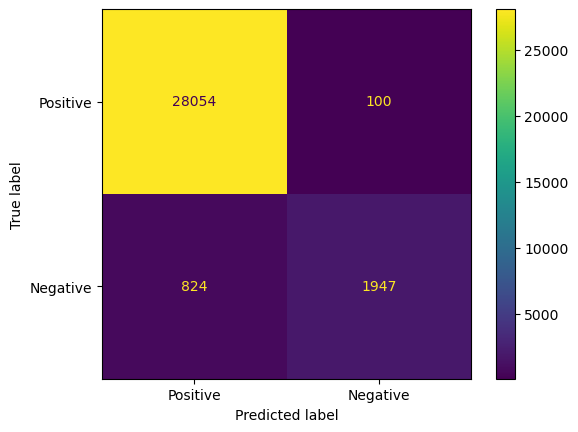

In [38]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = con_mat, display_labels = ["Positive", "Negative"])
cm_display.plot()
plt.show()

In [31]:
from sklearn.svm import SVC

In [32]:
svc = SVC()

In [36]:
param_grid = {"C":[0.01, 1, 100], "kernel":["rbf", "linear"]}
grid = GridSearchCV(svc, param_grid)

In [37]:
grid.fit(X_train, y_train)

KeyboardInterrupt: 

In [43]:
y_pred2 = grid.predict(X_test)

In [44]:
accuracy_score(y_test, y_pred2)

0.9637833468067907

In [50]:
grid.best_params_

{'C': 100, 'kernel': 'rbf'}

In [45]:
con_mat = confusion_matrix(y_test, y_pred2)

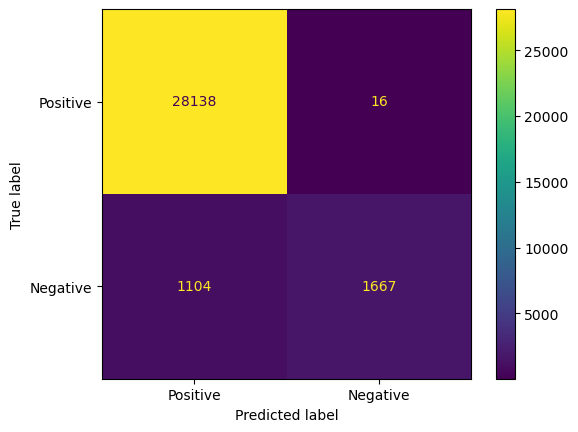

In [46]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = con_mat, display_labels = ["Positive", "Negative"])
cm_display.plot()
plt.show()

In [33]:
svc = SVC(C=100, kernel='rbf', probability=True)
svc.fit(X_train, y_train)

SVC(C=100, probability=True)

In [34]:
y_pred3 = svc.predict(X_test)
accuracy_score(y_test, y_pred3)

0.9637833468067907

In [45]:
m = {}
for i in X.columns:
    m[i] = 0

gen = int(input("Enter 0 for male, 1 for female: "))
m['gender'] = gen

age = float(input("Enter your age: "))
m['age'] = age/100

ht = int(input("Enter 1 if you have hypertension, else 0:  "))
m['hypertension'] = ht

hd = int(input("Enter 1 if you have heart-disease, else 0:  "))
m['heart_disease'] = hd

bmi = float(input("Enter your bmi:  "))
m['bmi'] = bmi

HbA1c_level = float(input("Enter your HbA1c_level:   "))
m['HbA1c_level'] = HbA1c_level

blood_glucose_level = int(input("Enter your blood glucose level: "))
m['blood_glucose_level'] = blood_glucose_level

smoking = int(input("Enter 0 if you have never smoked, 1 for currently smoking or 2 for formerly smoked: "))
if smoking == 0:
    m['never'] == 1 #never -2
elif smoking == 1:
    m['current'] = 1
else:
    m['former'] = 1


predictors = [list(m.values())]
outcome = svc.predict(predictors)[0]
prob = svc.predict_proba(predictors)[0]

if outcome == 0:
    print("You don't have Diabetes: ")
    print(f"Probablity of the outcome is {round(prob[0]*100, 2)}%. ")
else:
    print("You have Diabetes: ")
    print(f"Probablity of the outcome is {round(prob[1]*100, 2)}%. ")
    
if outcome == 1 and prob[1] > 0.80:
    print(f"Consult Doctor Immediately: ")


Enter 0 for male, 1 for female: 0
Enter your age: 70
Enter 1 if you have hypertension, else 0:  1
Enter 1 if you have heart-disease, else 0:  1
Enter your bmi:  30
Enter your HbA1c_level:   6.6
Enter your blood glucose level: 140
Enter 0 if you have never smoked, 1 for currently smoking or 2 for formerly smoked: 1
You don't have Diabetes: 
Probablity of the outcome is 54.27%. 


/Users/tanish/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/tanish/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [72]:
from joblib import dump, load

Enter 0 for male, 1 for female: 0
Enter your age: 80
Enter 1 if you have hypertension, else 0:  0
Enter 1 if you have heart-disease, else 0:  1
Enter your bmi:  25.19
Enter your HbA1c_level:   6.6
Enter your blood glucose level: 140
Enter 0 if you have never smoked, 1 for currently smoking or 2 for formerly smoked: 0
You don't have Diabetes: 
Probablity of the outcome is 70.63%. 


/Users/tanish/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/tanish/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [35]:
from joblib import dump, load

In [36]:
dump(svc, "Diabetes.joblib")

['Diabetes.joblib']